In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from PIL import Image
import pandas as pd
import seaborn as sns

In [5]:
DATASET_DIR = Path("data/")
CLASS_NAMES = ["NORMAL", "PNEUMONIA"]


In [13]:

def load_image_df(data_split):
    """
    Load the image paths and labels into a DataFrame.
    Args:
        data_split (str): The data split to load (train, val, test). Loads from the corresponding directory.
    """
    image_paths = [] # list of paths to all the images
    labels = [] # associated labels for the images (NORMAL or PNEUMONIA)
    label_map = {"NORMAL": 0, "PNEUMONIA": 1} # mapping from class name to label


    index = 0
    for class_name in CLASS_NAMES:
        class_dir = os.path.join(DATASET_DIR, data_split, class_name)
        
        file_names = os.listdir(class_dir)
        count = 0
        for file_name in file_names:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_dir, file_name)
                image_paths.append(image_path)
                labels.append(class_name)
               
                count += 1
                index += 1
        print(f"Found {count} images in {class_name} class for {data_split} set.")

    print(f"Total images in {data_split} set: {len(image_paths)} \n")

    df = pd.DataFrame({
    "filepath": image_paths,
    "label": labels
    })
    df['encoded_label'] = df['label'].map(label_map)

    return df

In [14]:

train_data_df = load_image_df("train")
val_data_df = load_image_df("val")
test_data_df = load_image_df("test")
print(train_data_df.head())
train_data_df.info()

Found 1341 images in NORMAL class for train set.
Found 3875 images in PNEUMONIA class for train set.
Total images in train set: 5216 

Found 8 images in NORMAL class for val set.
Found 8 images in PNEUMONIA class for val set.
Total images in val set: 16 

Found 234 images in NORMAL class for test set.
Found 390 images in PNEUMONIA class for test set.
Total images in test set: 624 

                                      filepath   label  encoded_label
0  data/train/NORMAL/NORMAL2-IM-0927-0001.jpeg  NORMAL              0
1  data/train/NORMAL/NORMAL2-IM-1056-0001.jpeg  NORMAL              0
2          data/train/NORMAL/IM-0427-0001.jpeg  NORMAL              0
3  data/train/NORMAL/NORMAL2-IM-1260-0001.jpeg  NORMAL              0
4     data/train/NORMAL/IM-0656-0001-0001.jpeg  NORMAL              0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0 

In [15]:
# save the dataframes to csv files
train_data_df.to_csv("data/train_data.csv", index=False)
val_data_df.to_csv("data/val_data.csv", index=False)
test_data_df.to_csv("data/test_data.csv", index=False)

Class distribution:
label
PNEUMONIA    3875
NORMAL       1341
Name: count, dtype: int64


/var/folders/9z/yj4b0q256fs12rkt272k2b480000gn/T/ipykernel_85603/3555110854.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_data_df, palette='viridis')


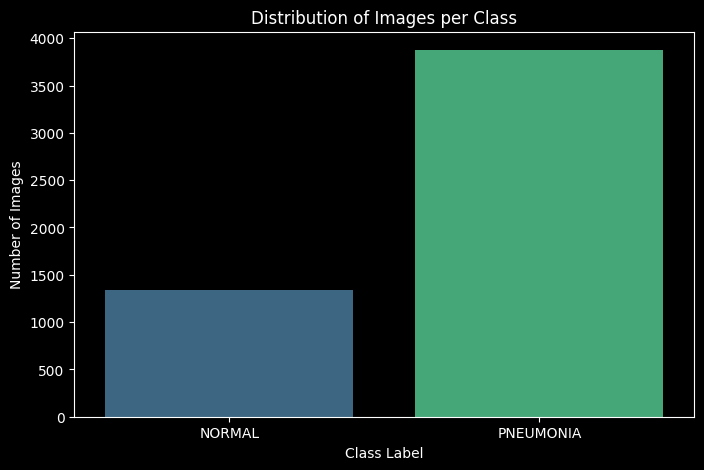

In [9]:
# Class distribution count
class_counts = train_data_df['label'].value_counts()
print("Class distribution:")
print(class_counts)
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train_data_df, palette='viridis')
plt.title('Distribution of Images per Class')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.show()

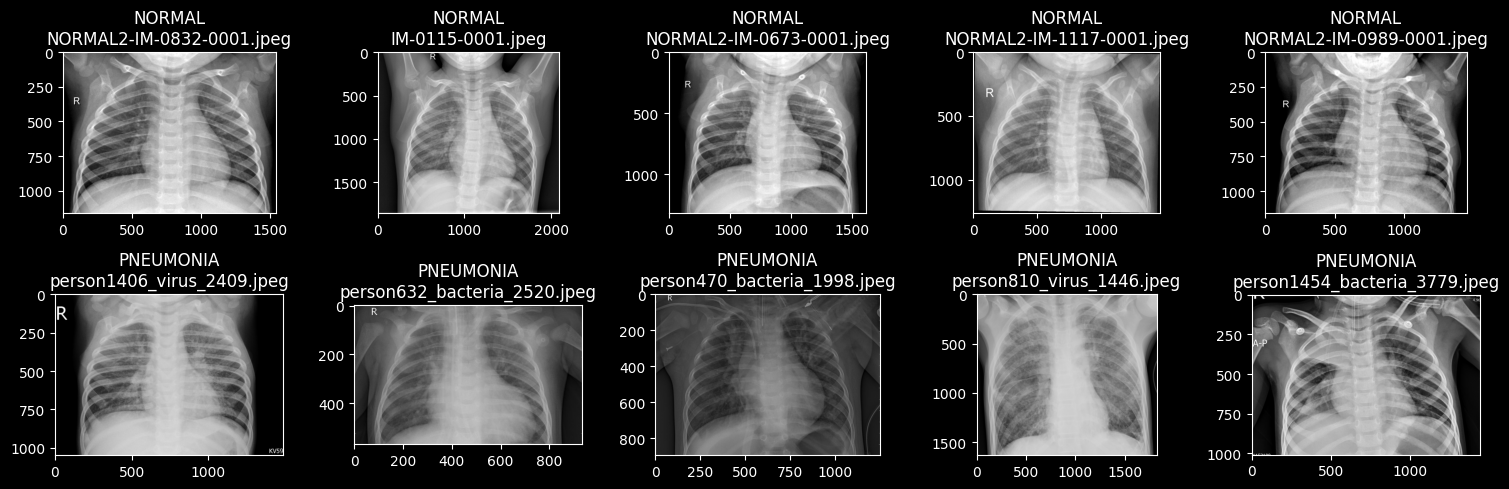

In [10]:
# display some images
def display_images(CLASS_NAMES, train_data, n=5):
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(CLASS_NAMES):
        sample_indices = train_data[train_data['label'] == class_name].sample(n).index # get random sample indices
        sample_filepaths = train_data.loc[sample_indices, 'filepath'].tolist() # get filepaths for the sample indices

        for j, filepath in enumerate(sample_filepaths):
            try:
                img = Image.open(filepath)
                ax = plt.subplot( 2, n, i * n + j + 1)
                plt.imshow(img, cmap='gray')
                plt.title(f"{class_name}\n{os.path.basename(filepath)}")
            except Exception as e:
                print(f"Error loading or displaying image {filepath}: {e}")
    plt.tight_layout()
    plt.show()


# Display some images from the dataset
display_images(CLASS_NAMES, train_data_df)



Minimum image size index: [1367 1367]
Minimum image size: [384 127]
Maximum image size: [2916 2663]


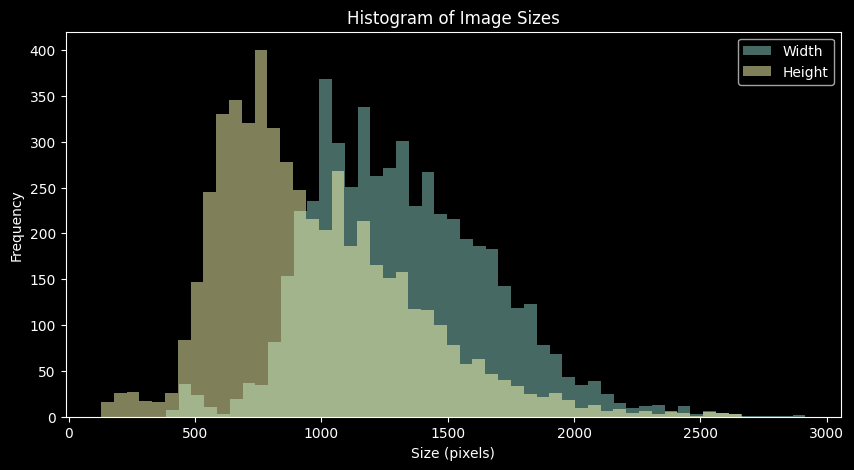

In [37]:
# examine image sizes
image_sizes = []
for filepath in image_paths:
    try:
        img = Image.open(filepath)
        image_sizes.append(img.size)
    except Exception as e:
        print(f"Error loading image {filepath}: {e}")

# Convert to numpy array for easier manipulation
image_sizes = np.array(image_sizes)
min_size = image_sizes.min(axis=0)
min_size_idx = np.argmin(image_sizes, axis=0)
print(f"Minimum image size index: {min_size_idx}")
max_size = image_sizes.max(axis=0)
print(f"Minimum image size: {min_size}")
print(f"Maximum image size: {max_size}")
# Plot histogram of image sizes
plt.figure(figsize=(10, 5))
plt.hist(image_sizes[:, 0], bins=50, alpha=0.5, label='Width')
plt.hist(image_sizes[:, 1], bins=50, alpha=0.5, label='Height')
plt.title('Histogram of Image Sizes')
plt.xlabel('Size (pixels)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

[384 127]
person407_virus_811.jpeg


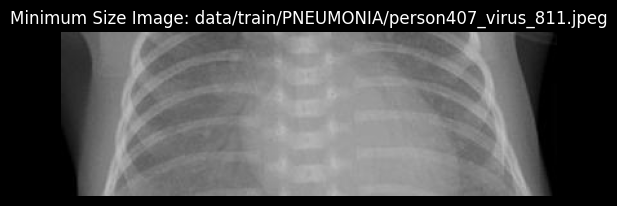

In [40]:
print(image_sizes[1367])
print(index_to_filename[1367])
# Display the image with the minimum size
min_size_image_path = image_paths[min_size_idx[0]]
min_size_image = Image.open(min_size_image_path)
plt.imshow(min_size_image)
plt.title(f"Minimum Size Image: {min_size_image_path}")
plt.axis('off')
plt.show()